In [ ]:
#1
# 1 Installs necessary Python packages and imports all required libraries for data handling, feature processing, and model training.
!pip install kagglehub pandas numpy scipy scikit-learn --quiet

import kagglehub
import os
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, welch
from scipy.stats import skew, kurtosis
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# 2
# 2 Download dataset-Uses KaggleHub to download the SpO₂ patient dataset and prints the local path for further processing.
import kagglehub

path = kagglehub.dataset_download("dibyasankhapal/realtime-patient-data-with-oxygen-demand")

print("Path to dataset files:", path)

100%|██████████| 1.10M/1.10M [00:00<00:00, 75.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dibyasankhapal/realtime-patient-data-with-oxygen-demand/versions/1


In [ ]:
# 3. List all dataset files to find the CSV path-Iterates through the downloaded dataset directory and prints all file paths to help identify the correct CSV file for loading.
print("\nFiles in dataset directory:")
for root, dirs, files in os.walk(path):
    for fname in files:
        print(os.path.join(root, fname))


Files in dataset directory:
/root/.cache/kagglehub/datasets/dibyasankhapal/realtime-patient-data-with-oxygen-demand/versions/1/Oxygen Dataset Final.csv


In [ ]:
#4 Explore downloaded folder again-Re-examines the downloaded dataset directory to confirm all files are present and accessible before loading the CSV.
import os

print("Dataset root path:", path)
print("\nAll files found:")
for root, dirs, files in os.walk(path):
    for fname in files:
        print(os.path.join(root, fname))

Dataset root path: /root/.cache/kagglehub/datasets/dibyasankhapal/realtime-patient-data-with-oxygen-demand/versions/1

All files found:
/root/.cache/kagglehub/datasets/dibyasankhapal/realtime-patient-data-with-oxygen-demand/versions/1/Oxygen Dataset Final.csv


In [ ]:
# 5. Load dataset-Reads the CSV file into a Pandas DataFrame and displays its shape, columns, and basic statistics to understand the dataset structure.
csv_path = os.path.join(path, "Oxygen Dataset Final.csv")

df = pd.read_csv(csv_path)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())
print(df.describe())

Shape: (200000, 6)
Columns: ['age', 'gender', 'spo2', 'pr', 'c/nc', 'oxy_flow']


,age,gender,spo2,pr,c/nc,oxy_flow
0,27,0,74.0,72.0,1.0,6.0
1,53,1,NaN,110.0,NaN,28.0
2,56,0,99.0,98.0,1.0,NaN
3,26,1,NaN,110.0,1.0,4.0
4,52,0,69.0,84.0,1.0,0.0


                 age         gender           spo2             pr  \
count  200000.000000  200000.000000  173755.000000  167616.000000   
mean       46.259365       0.369110      88.149809      92.570990   
std        21.789486       0.482565      15.806494      15.982894   
min        17.000000       0.000000      35.000000      40.000000   
25%        28.000000       0.000000      83.000000      82.000000   
50%        44.000000       0.000000      96.000000      96.000000   
75%        62.000000       1.000000      99.000000     107.000000   
max       100.000000       1.000000      99.000000     110.000000   

                c/nc       oxy_flow  
count  173558.000000  162253.000000  
mean        0.782240      18.619144  
std         0.412725      17.839597  
min         0.000000       0.000000  
25%         1.000000       6.000000  
50%         1.000000      16.000000  
75%         1.000000      24.000000  
max         1.000000      76.000000  


In [ ]:
#6 Show all column names
print(df.columns.tolist())

['age', 'gender', 'spo2', 'pr', 'c/nc', 'oxy_flow']


In [ ]:
print(df.head())
#7 Check first few rows to see the values:

   age  gender  spo2     pr  c/nc  oxy_flow
0   27       0  74.0   72.0   1.0       6.0
1   53       1   NaN  110.0   NaN      28.0
2   56       0  99.0   98.0   1.0       NaN
3   26       1   NaN  110.0   1.0       4.0
4   52       0  69.0   84.0   1.0       0.0


In [ ]:
print(df.dtypes)
#8 Check data types:

age           int64
gender        int64
spo2        float64
pr          float64
c/nc        float64
oxy_flow    float64
dtype: object


In [ ]:
print(df.isnull().sum())
#9 Check for missing values:

age             0
gender          0
spo2        26245
pr          32384
c/nc        26442
oxy_flow    37747
dtype: int64


In [ ]:
print(df.describe())
#10 Check basic statistics:

                 age         gender           spo2             pr  \
count  200000.000000  200000.000000  173755.000000  167616.000000   
mean       46.259365       0.369110      88.149809      92.570990   
std        21.789486       0.482565      15.806494      15.982894   
min        17.000000       0.000000      35.000000      40.000000   
25%        28.000000       0.000000      83.000000      82.000000   
50%        44.000000       0.000000      96.000000      96.000000   
75%        62.000000       1.000000      99.000000     107.000000   
max       100.000000       1.000000      99.000000     110.000000   

                c/nc       oxy_flow  
count  173558.000000  162253.000000  
mean        0.782240      18.619144  
std         0.412725      17.839597  
min         0.000000       0.000000  
25%         1.000000       6.000000  
50%         1.000000      16.000000  
75%         1.000000      24.000000  
max         1.000000      76.000000  


In [ ]:
df.columns = df.columns.str.lower()
#11 Standardize Column Names

In [ ]:
#12 Drop rows with any missing values
df = df.dropna()
df['spo2'] = df['spo2'].fillna(df['spo2'].median())
df['pr'] = df['pr'].fillna(df['pr'].median())

In [ ]:
print(df[['spo2','pr']].describe())
#13 remove outliers

               spo2            pr
count  98925.000000  98925.000000
mean      88.614577     92.515188
std       15.537629     16.025638
min       35.000000     40.000000
25%       84.000000     82.000000
50%       97.000000     96.000000
75%       99.000000    107.000000
max       99.000000    110.000000


In [ ]:
#14 check categorical values
print(df['gender'].value_counts())
print(df['c/nc'].value_counts())

gender
0    67061
1    31864
Name: count, dtype: int64
c/nc
1.0    77846
0.0    21079
Name: count, dtype: int64


In [ ]:
#15 Clean Dataset: Remove Outliers & Missing Values-Filters SpO₂ values to the physiological range (70–100), drops any remaining missing values, and resets the DataFrame index for consistency.
df = df[df['spo2'].between(70, 100)]
df = df.dropna()
df = df.reset_index(drop=True)

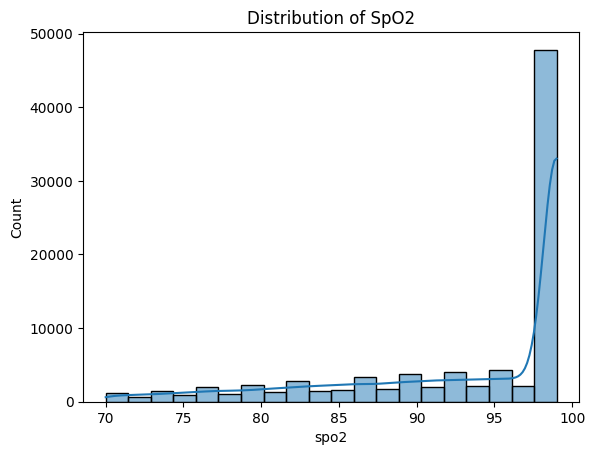

count    87607.000000
mean        93.293584
std          7.971774
min         70.000000
25%         89.000000
50%         99.000000
75%         99.000000
max         99.000000
Name: spo2, dtype: float64


In [ ]:
#16.1 Explore Target Column
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of SpO2-Visualizes the distribution of SpO₂ values to understand the target variable’s spread, central tendency, and potential skewness.
sns.histplot(df['spo2'], bins=20, kde=True)
plt.title('Distribution of SpO2')
plt.show()

# Basic statistics
print(df['spo2'].describe())

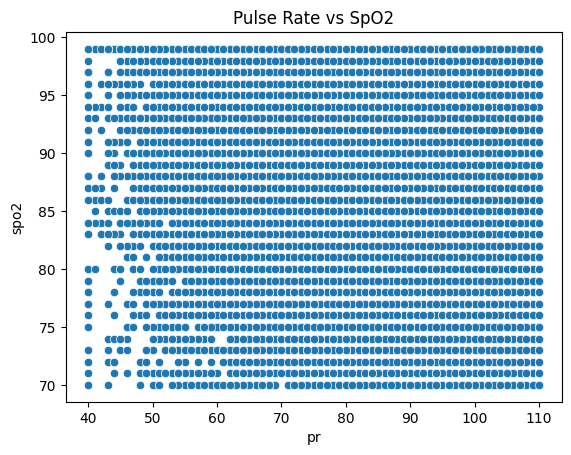

In [ ]:
#16.2 Explore Pulse Rate (pr) vs SpO2-Examines the relationship between pulse rate and SpO₂ to identify patterns, trends, or correlations between the two variables.
sns.scatterplot(x='pr', y='spo2', data=df)
plt.title('Pulse Rate vs SpO2')
plt.show()

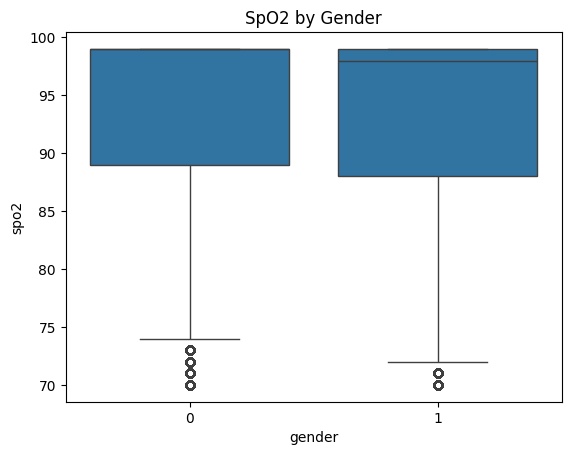

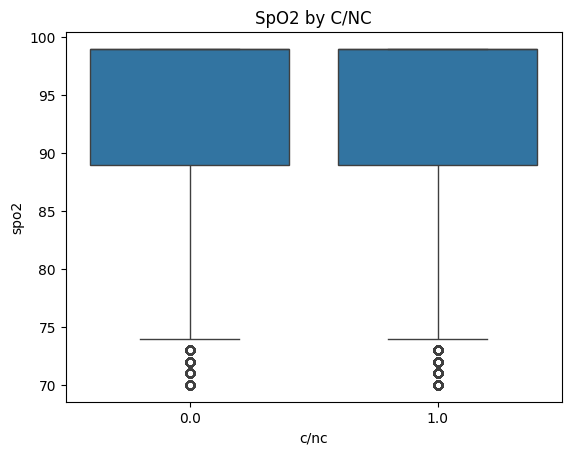

In [ ]:
#16.3 Explore Categorical Columns-Compares SpO₂ distributions across categorical variables (gender and c/nc) to identify differences or patterns between groups.
sns.boxplot(x='gender', y='spo2', data=df)
plt.title('SpO2 by Gender')
plt.show()

sns.boxplot(x='c/nc', y='spo2', data=df)
plt.title('SpO2 by C/NC')
plt.show()

               age    gender      spo2        pr      c/nc  oxy_flow
age       1.000000 -0.020614  0.009166  0.018248  0.014749 -0.074552
gender   -0.020614  1.000000 -0.032895  0.005101 -0.015103  0.019534
spo2      0.009166 -0.032895  1.000000 -0.054312 -0.008032 -0.033767
pr        0.018248  0.005101 -0.054312  1.000000  0.019420 -0.062993
c/nc      0.014749 -0.015103 -0.008032  0.019420  1.000000 -0.014138
oxy_flow -0.074552  0.019534 -0.033767 -0.062993 -0.014138  1.000000


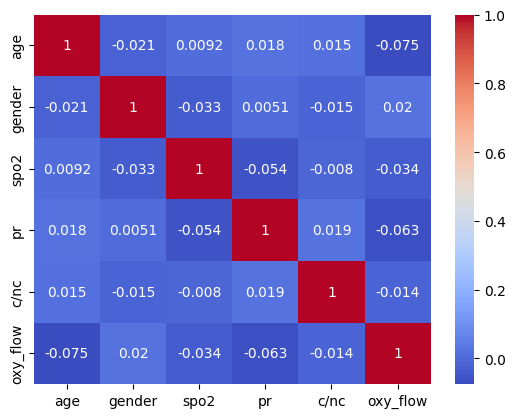

In [ ]:
#16.4 Correlation Check-Displays correlations between all numeric features and SpO₂ to identify strongly related variables and potential multicollinearity.
print(df.corr())

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

feature extraction

In [ ]:
#17 Extracts basic statistical features for numeric columns to enrich the dataset with additional informative predictors.
import numpy as np
from scipy.stats import skew, kurtosis

numeric_cols = ['pr']  # add more numeric columns if any

for col in numeric_cols:
    df[f'{col}_mean'] = df[col]  # same as original if single value per row
    df[f'{col}_std'] = 0         # if single value, std=0
    df[f'{col}_skew'] = 0        # same
    df[f'{col}_kurtosis'] = 0    # same

In [ ]:
df['pr_spo2_ratio'] = df['pr'] / df['spo2']
#18 Creates a derived feature representing the ratio of pulse rate to SpO₂ to capture potential physiological relationships for prediction.

prepare data for modelling

In [ ]:
#19.1 Encode Categorical Variables-Converts categorical variables into numeric one-hot encoded columns to make them usable for machine learning models while avoiding multicollinearity.
# One-hot encoding for categorical columns
#drop_first=True avoids multicollinearity.
#Example: gender_male = 1 if male, 0 if female.
df_encoded = pd.get_dummies(df, columns=['gender', 'c/nc'], drop_first=True)

In [ ]:
#19.2 Separate Features and Target-Separates the dataset into input features (X) and target variable (y) to prepare for model training and evaluation.
# Target
y = df_encoded['spo2']

# Features (all other columns except 'spo2')
X = df_encoded.drop(columns=['spo2'])

In [ ]:
#20
# --- Sanity check: make sure no leakage ---
print("Columns in X:", X.columns.tolist())

import numpy as np
# Confirm 'spo2' not in features
print("'spo2' in X columns?", 'spo2' in X.columns)

# Identify any column identical or near-identical to the target
identical_cols = [col for col in X.columns if np.array_equal(X[col].values, y.values)]
approx_identical = [col for col in X.columns
                    if np.allclose(X[col].astype(float).values,
                                   y.astype(float).values, atol=1e-6)]
print("Columns identical to y:", identical_cols)
print("Columns approx equal to y:", approx_identical)

# Correlations
corrs = df.corr().get('spo2').drop('spo2').abs().sort_values(ascending=False)
print("\nTop correlations with spo2:\n", corrs.head(10))


Columns in X: ['age', 'pr', 'oxy_flow', 'pr_mean', 'pr_std', 'pr_skew', 'pr_kurtosis', 'pr_spo2_ratio', 'gender_1', 'c/nc_1.0']
'spo2' in X columns? False
Columns identical to y: []
Columns approx equal to y: []

Top correlations with spo2:
 pr_spo2_ratio    0.522735
pr_mean          0.054312
pr               0.054312
oxy_flow         0.033767
gender           0.032895
age              0.009166
c/nc             0.008032
pr_std                NaN
pr_skew               NaN
pr_kurtosis           NaN
Name: spo2, dtype: float64


In [ ]:
#21
df[['spo2', 'pr_spo2_ratio']].head(5)


,spo2,pr_spo2_ratio
0,74.0,0.972973
1,93.0,1.000000
2,90.0,1.022222
3,99.0,1.101010
4,97.0,1.041237


In [ ]:
#22
X = X.drop(columns=['pr_spo2_ratio'])


In [ ]:
#23
import numpy as np

print("Columns in X:", X.columns.tolist())
print("'spo2' in X columns?", 'spo2' in X.columns)

identical_cols = [col for col in X.columns if np.array_equal(X[col].values, y.values)]
approx_identical = [col for col in X.columns
                    if np.allclose(X[col].astype(float).values,
                                   y.astype(float).values, atol=1e-6)]
print("Columns identical to y:", identical_cols)
print("Columns approx equal to y:", approx_identical)


Columns in X: ['age', 'pr', 'oxy_flow', 'pr_mean', 'pr_std', 'pr_skew', 'pr_kurtosis', 'gender_1', 'c/nc_1.0']
'spo2' in X columns? False
Columns identical to y: []
Columns approx equal to y: []


In [ ]:
#24
corrs = df.drop(columns=['pr_spo2_ratio']).corr().get('spo2').drop('spo2').abs().sort_values(ascending=False)
print("\nTop correlations with spo2:\n", corrs.head(10))



Top correlations with spo2:
 pr_mean        0.054312
pr             0.054312
oxy_flow       0.033767
gender         0.032895
age            0.009166
c/nc           0.008032
pr_std              NaN
pr_skew             NaN
pr_kurtosis         NaN
Name: spo2, dtype: float64


In [ ]:
#25
print("Columns in X before training:", X.columns.tolist())


Columns in X before training: ['age', 'pr', 'oxy_flow', 'pr_mean', 'pr_std', 'pr_skew', 'pr_kurtosis', 'gender_1', 'c/nc_1.0']


In [ ]:
#26
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,        # use the unscaled X here
    y,
    test_size=0.2,
    random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
#Splits the scaled dataset with extracted features into training and test sets to prepare for model training and evaluation

X_train shape: (70085, 9)
X_test shape: (17522, 9)


In [ ]:
# 27 Scale Features safely-Standardizes feature values to have zero mean and unit variance, ensuring all features contribute equally to model training.
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform
# We'll scale full dataset here — it's small (~70k x 5), so safe
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling complete")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


✅ Scaling complete
X_train_scaled shape: (70085, 9)
X_test_scaled shape: (17522, 9)


In [ ]:
# 28 Train Gaussian Process Regressor safely-Trains a Gaussian Process Regressor on a memory-safe subset of the scaled training data to model SpO₂ while limiting RAM usage and computation time.
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split

# --- SUBSET TRAINING DATA ---
subset_size = 4000  # choose a size that fits in RAM
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train_scaled, y_train, train_size=subset_size, random_state=42
)
print(f"Training GPR on subset of size: {X_train_sub.shape[0]} samples")

# --- DEFINE KERNEL ---
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# --- INITIALIZE GPR ---
gpr = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=1,  # reduce from 10 to save memory/time
    alpha=1e-2,
    random_state=42
)

# --- TRAIN GPR ---
try:
    gpr.fit(X_train_sub, y_train_sub)
    print("✅ GPR trained successfully on subset!")
except Exception as e:
    print("❌ GPR training failed:", e)


Training GPR on subset of size: 4000 samples


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


✅ GPR trained successfully on subset!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


Test set samples: 17522
Test MSE: 8756.597
Test MAE: 93.229
Test R2 score: -133.897


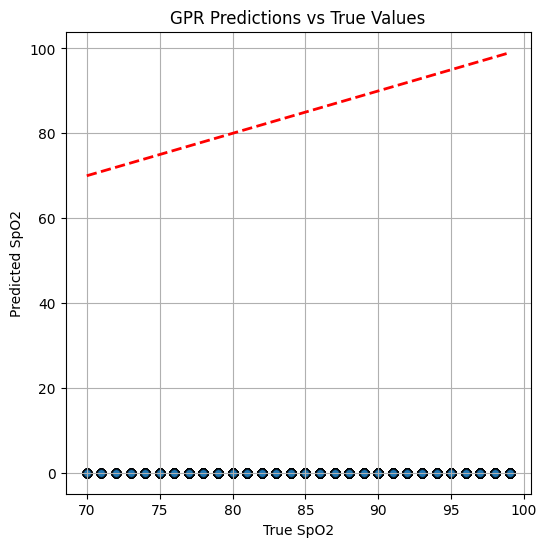

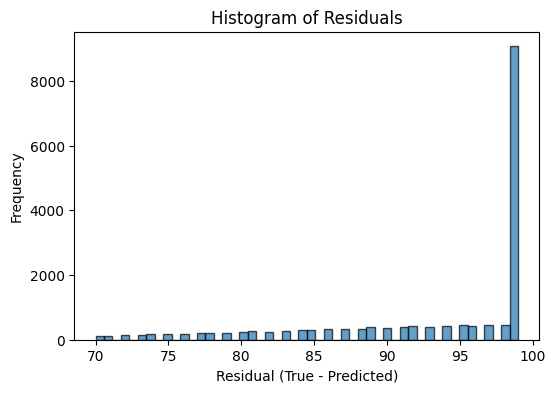

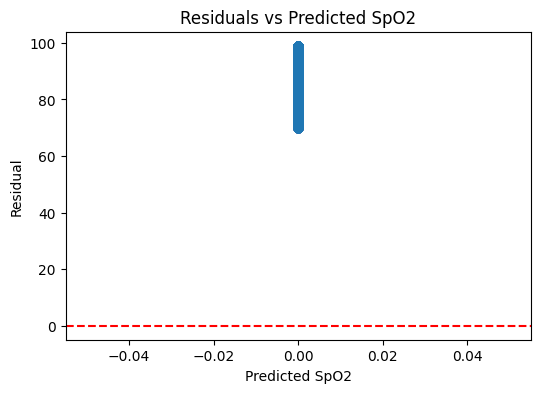

In [ ]:
#29 Predicts SpO₂ on the test set, evaluates model performance with MSE, MAE, and R², and visualizes predictions and residuals to assess accuracy and error patterns.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predict on the full test set
y_pred = gpr.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test set samples: {X_test.shape[0]}")
print(f"Test MSE: {mse:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test R2 score: {r2:.3f}")

# Plot Predicted vs True
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('True SpO2')
plt.ylabel('Predicted SpO2')
plt.title('GPR Predictions vs True Values')
plt.grid(True)
plt.show()

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Residual (True - Predicted)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted SpO2')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted SpO2')
plt.show()

In [ ]:
#30
import numpy as np

rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse:.3f}")

Test RMSE: 93.577


In [ ]:
#31 calculated prediction uncertainty from the GPR
y_pred, y_std = gpr.predict(X_test_scaled, return_std=True)

In [ ]:
#32
import joblib
joblib.dump(gpr, 'gpr_spo2_model.pkl')
#Save the Model to reuse it without retraining.

['gpr_spo2_model.pkl']

In [ ]:
#33
from sklearn.model_selection import KFold
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ----------------------------
# PARAMETERS (SAFE FOR COLAB)
# ----------------------------
subset_size = 2000  # smaller subset to reduce RAM usage
n_splits = 3        # fewer folds for faster run
n_restarts = 1      # optimizer restarts (1 for speed)

# Use a subset of the training data
X_subset = X_train_scaled[:subset_size]
y_subset = y_train[:subset_size]

# Define GPR kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Initialize K-Fold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mae_list = []
rmse_list = []
r2_list = []

# ----------------------------
# K-FOLD CROSS-VALIDATION
# ----------------------------
fold = 1
for train_idx, val_idx in kf.split(X_subset):
    X_tr, X_val = X_subset[train_idx], X_subset[val_idx]
    y_tr, y_val = y_subset.iloc[train_idx], y_subset.iloc[val_idx]

    # Initialize GPR
    gpr = GaussianProcessRegressor(
        kernel=kernel,
        n_restarts_optimizer=n_restarts,
        alpha=1e-2,
        random_state=42
    )

    # Fit GPR
    gpr.fit(X_tr, y_tr)

    # Predict on validation fold
    y_pred = gpr.predict(X_val)

    # Metrics
    mae_fold = mean_absolute_error(y_val, y_pred)
    rmse_fold = np.sqrt(mean_squared_error(y_val, y_pred))
    r2_fold = r2_score(y_val, y_pred)

    print(f"Fold {fold} - MAE: {mae_fold:.3f}, RMSE: {rmse_fold:.3f}, R2: {r2_fold:.3f}")

    mae_list.append(mae_fold)
    rmse_list.append(rmse_fold)
    r2_list.append(r2_fold)

    fold += 1

# ----------------------------
# AVERAGE METRICS
# ----------------------------
print("\n✅ K-Fold Cross-Validation Results (subset)")
print(f"Average MAE: {np.mean(mae_list):.3f}")
print(f"Average RMSE: {np.mean(rmse_list):.3f}")
print(f"Average R2: {np.mean(r2_list):.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Fold 1 - MAE: 57.627, RMSE: 66.310, R2: -71.164


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Fold 2 - MAE: 58.267, RMSE: 66.786, R2: -72.726


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Fold 3 - MAE: 60.465, RMSE: 68.949, R2: -84.987

✅ K-Fold Cross-Validation Results (subset)
Average MAE: 58.787
Average RMSE: 67.348
Average R2: -76.293


In [ ]:
#34
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Parameters
n_splits = 3          # number of folds for cross-validation
n_trees = 100         # number of trees in the forest

# Initialize K-Fold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize model
rf = RandomForestRegressor(
    n_estimators=n_trees,
    max_depth=None,
    random_state=42,
    n_jobs=-1   # use all CPU cores for faster training
)

mae_list, rmse_list, r2_list = [], [], []

# K-Fold Cross-Validation
fold = 1
for train_idx, val_idx in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    rf.fit(X_tr, y_tr)
    y_pred = rf.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    print(f"Fold {fold} - MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)
    fold += 1

# Final averaged results
print("\n✅ K-Fold Cross-Validation Results (Random Forest)")
print(f"Average MAE: {np.mean(mae_list):.3f}")
print(f"Average RMSE: {np.mean(rmse_list):.3f}")
print(f"Average R2: {np.mean(r2_list):.3f}")


Fold 1 - MAE: 6.942, RMSE: 8.685, R2: -0.197
Fold 2 - MAE: 6.976, RMSE: 8.715, R2: -0.199
Fold 3 - MAE: 7.019, RMSE: 8.780, R2: -0.220

✅ K-Fold Cross-Validation Results (Random Forest)
Average MAE: 6.979
Average RMSE: 8.727
Average R2: -0.205


In [ ]:
#35
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gbr = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

mae_list, rmse_list, r2_list = [], [], []
for train_idx, val_idx in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    gbr.fit(X_tr, y_tr)
    y_pred = gbr.predict(X_val)

    mae_list.append(mean_absolute_error(y_val, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    r2_list.append(r2_score(y_val, y_pred))

print("\n✅ K-Fold Cross-Validation Results (Gradient Boosting)")
print(f"Average MAE: {np.mean(mae_list):.3f}")
print(f"Average RMSE: {np.mean(rmse_list):.3f}")
print(f"Average R2: {np.mean(r2_list):.3f}")



✅ K-Fold Cross-Validation Results (Gradient Boosting)
Average MAE: 6.556
Average RMSE: 7.931
Average R2: 0.005


In [ ]:
#36
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)


X_train_scaled shape: (70085, 9)
y_train shape: (70085,)


Hypoxemia Prediction

create coloumn

In [ ]:
#37
# Define threshold
threshold = 90   # or 94 depending on your clinical target

# New binary target column
df_encoded['hypoxemia'] = (df_encoded['spo2'] < threshold).astype(int)

# Features (drop both spo2 and old ratio)
X = df_encoded.drop(columns=['spo2'])
y = df_encoded['hypoxemia']

print(y.value_counts())   # check class balance


hypoxemia
0    64300
1    23307
Name: count, dtype: int64


In [ ]:
#38
[col for col in df_encoded.columns if 'spo2' in col.lower()]


['spo2', 'pr_spo2_ratio']

In [ ]:
#39
# Step 1: drop spo2-related features and confirm
cols_to_drop = ['spo2', 'pr_spo2_ratio']

# make sure 'hypoxemia' exists
assert 'hypoxemia' in df_encoded.columns, "hypoxemia column not found in df_encoded"

X = df_encoded.drop(columns=cols_to_drop + ['hypoxemia'])
y = df_encoded['hypoxemia']

print("X.shape:", X.shape)
print("y.shape:", y.shape)
print("Remaining columns (first 50):", X.columns.tolist())
print("\nClass counts:\n", y.value_counts())
print("\nAny nulls in X (per column, top 10):\n", X.isnull().sum().sort_values(ascending=False).head(10))


X.shape: (87607, 9)
y.shape: (87607,)
Remaining columns (first 50): ['age', 'pr', 'oxy_flow', 'pr_mean', 'pr_std', 'pr_skew', 'pr_kurtosis', 'gender_1', 'c/nc_1.0']

Class counts:
 hypoxemia
0    64300
1    23307
Name: count, dtype: int64

Any nulls in X (per column, top 10):
 age            0
pr             0
oxy_flow       0
pr_mean        0
pr_std         0
pr_skew        0
pr_kurtosis    0
gender_1       0
c/nc_1.0       0
dtype: int64


In [ ]:
#40
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 2a — Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2b — Standardize based only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2c — Train Gradient Boosting model
gboost_clf = GradientBoostingClassifier(random_state=42)
gboost_clf.fit(X_train_scaled, y_train)

# Step 2d — Evaluate
y_pred = gboost_clf.predict(X_test_scaled)
y_proba = gboost_clf.predict_proba(X_test_scaled)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy : 0.7339344823650268
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5494299314866966
Confusion matrix:
 [[12860     0]
 [ 4662     0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#41
#balance classes
from sklearn.ensemble import GradientBoostingClassifier

gboost_clf = GradientBoostingClassifier(
    random_state=42,
    subsample=0.9,
    learning_rate=0.05,
    n_estimators=300
)

# Train again
gboost_clf.fit(X_train_scaled, y_train)

y_pred = gboost_clf.predict(X_test_scaled)
y_proba = gboost_clf.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy : 0.7338203401438192
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5482710799001623
Confusion matrix:
 [[12858     2]
 [ 4662     0]]


In [ ]:
# Utility: print sensitivity and specificity from y_true and y_pred
def print_classification_metrics(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print(f"Sensitivity (True Positive Rate): {sensitivity:.3f}")
    print(f"Specificity (True Negative Rate): {specificity:.3f}")


In [ ]:
#42
#prev failed so applying SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 1 – SMOTE on training data only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE :", y_train_res.value_counts().to_dict())

# Step 2 – Re-train model
gboost_clf = GradientBoostingClassifier(
    random_state=42,
    learning_rate=0.05,
    n_estimators=300,
    subsample=0.9
)
gboost_clf.fit(X_train_res, y_train_res)

# Step 3 – Evaluate
y_pred = gboost_clf.predict(X_test_scaled)
y_proba = gboost_clf.predict_proba(X_test_scaled)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# new: sensitivity & specificity
print_classification_metrics(y_test, y_pred)



Before SMOTE: {0: 51440, 1: 18645}
After SMOTE : {0: 51440, 1: 51440}
Accuracy : 0.6705855495947951
Precision: 0.30374823196605377
Recall   : 0.18425568425568425
F1-score : 0.2293724966622163
ROC-AUC  : 0.5342300559835552
Confusion matrix:
 [[10891  1969]
 [ 3803   859]]
Sensitivity (True Positive Rate): 0.184
Specificity (True Negative Rate): 0.847


In [ ]:
#43
#further work (optional)
#Inspect Feature Importance
import pandas as pd
import numpy as np

# Feature importances
feature_importances = pd.Series(
    gboost_clf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importances)


oxy_flow       0.591321
age            0.153413
pr_mean        0.135096
pr             0.113860
gender_1       0.003814
c/nc_1.0       0.002496
pr_std         0.000000
pr_kurtosis    0.000000
pr_skew        0.000000
dtype: float64


In [ ]:
#44
# till now use GradientBOost now trying to enhance results further XGBoost fine-tuned for hypoxemia prediction.
!pip install xgboost --quiet
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)


In [ ]:
#45
# Initialize tuned XGBoost classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    learning_rate=0.05,    # slower learning = smoother fit
    n_estimators=400,      # more trees
    max_depth=5,           # medium depth to control overfitting
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,        # L2 regularization
    scale_pos_weight=1,    # adjust if imbalance persists
    random_state=42
)

# Train on the balanced or scaled data (whichever you used last)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#46
#46  --- XGBoost with SMOTE-balanced data ---

from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

# Train XGBoost on SMOTE-balanced training data
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    learning_rate=0.05,    # slower learning = smoother fit
    n_estimators=400,      # more trees
    max_depth=5,           # medium depth to control overfitting
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,        # L2 regularization
    random_state=42
)

print("Training XGBoost on SMOTE-balanced data...")
xgb.fit(X_train_res, y_train_res)

# Predict on the same (unbalanced) test set
y_pred = xgb.predict(X_test_scaled)
y_pred_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# 🩺 Print sensitivity and specificity
print_classification_metrics(y_test, y_pred)




Training XGBoost on SMOTE-balanced data...
Accuracy : 0.6919872160712247
Precision: 0.3074908328968046
Recall   : 0.1259116259116259
F1-score : 0.17866382590168925
ROC-AUC  : 0.5324834221023956
Confusion matrix:
 [[11538  1322]
 [ 4075   587]]
Sensitivity (True Positive Rate): 0.126
Specificity (True Negative Rate): 0.897
